## Loading the Dataset and Takeing a Look

In [60]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option('display.max_rows', None)

warnings.simplefilter(action='ignore', category=Warning)

dataset = pd.read_csv("ford.csv")
df = dataset.copy()

In [61]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.70,1.00
1,Focus,2018,14000,Manual,9083,Petrol,150,57.70,1.00
2,Focus,2017,13000,Manual,12456,Petrol,150,57.70,1.00
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.30,1.50
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.70,1.00


In [62]:
df.columns = [i.upper() for i in df.columns]

In [63]:
def check_df(df):
    print("############### Shape ###############")
    print(df.shape)
    print("############### Info ###############")
    print(df.info())

In [64]:
check_df(df)

############### Shape ###############
(17966, 9)
############### Info ###############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MODEL         17966 non-null  object 
 1   YEAR          17966 non-null  int64  
 2   PRICE         17966 non-null  int64  
 3   TRANSMISSION  17966 non-null  object 
 4   MILEAGE       17966 non-null  int64  
 5   FUELTYPE      17966 non-null  object 
 6   TAX           17966 non-null  int64  
 7   MPG           17966 non-null  float64
 8   ENGINESIZE    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB
None


In [65]:
df.drop("TAX",axis=1, inplace=True)

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
Focus                        1
 Escort                      1
 Transit Tourneo             1
Name: MODEL, dtype: int64

Unique Classes:

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fus

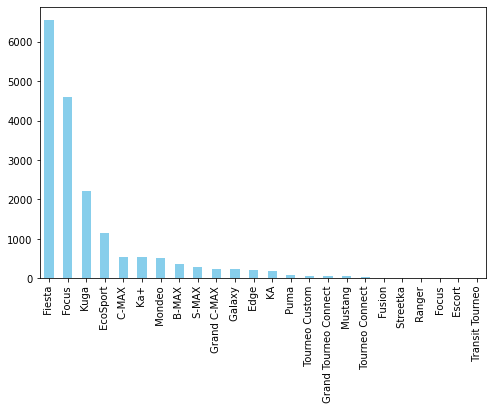

*****************************************************
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: TRANSMISSION, dtype: int64

Unique Classes:

['Automatic' 'Manual' 'Semi-Auto']


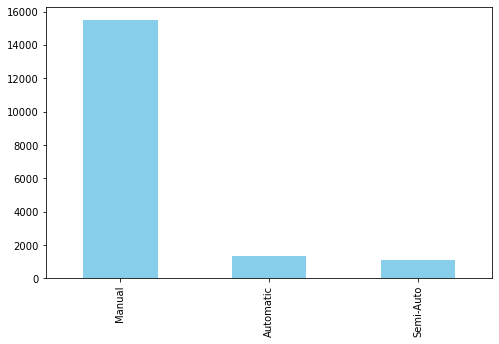

*****************************************************
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: FUELTYPE, dtype: int64

Unique Classes:

['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


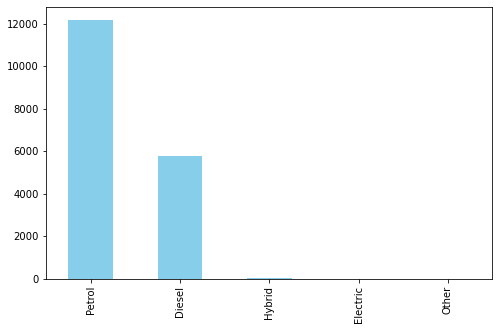

*****************************************************


In [66]:
# Analysis of Categorical Veriables

cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object"]]

for i in cat_cols:
    print(df[i].value_counts())
    print("\nUnique Classes:\n")
    print(df[i].unique())
    
    plt.figure(figsize=(8, 5))
    df[i].value_counts().plot(kind='bar', color='skyblue')
    plt.show()
    
    print("*****************************************************")

In [67]:
def target_summary_with_cat(df, target, categorical_col):
    print(df.groupby(categorical_col)[target].mean().sort_values(ascending=False))

In [68]:
for i in cat_cols:
    target_summary_with_cat(df, "PRICE",i)
    print("*****************************************************")

MODEL
 Mustang                 34631.26
 Edge                    22810.50
 Puma                    21447.25
 Tourneo Custom          21165.99
 Galaxy                  17841.87
 S-MAX                   17720.23
 Kuga                    15823.47
 Grand Tourneo Connect   14874.92
 Ranger                  14495.00
 Tourneo Connect         13805.82
 Focus                   13185.88
 EcoSport                12499.27
 Transit Tourneo         12450.00
 Mondeo                  12305.71
 Grand C-MAX             10881.57
 Fiesta                  10196.30
 C-MAX                    9914.57
 Ka+                      8707.86
Focus                     8299.00
 B-MAX                    8287.53
 KA                       5186.13
 Escort                   3000.00
 Fusion                   2555.81
 Streetka                 1924.50
Name: PRICE, dtype: float64
*****************************************************
TRANSMISSION
Automatic   15727.23
Semi-Auto   14919.03
Manual      11792.26
Name: PRICE, dtype: 

In [69]:
# Analysis of Numerical Veriables

In [70]:
def num_summary(df, numerical_col, plot=False):
    print(df[i].describe().T)
    
    if plot:
        df[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [71]:
num_cols = [i for i in df.columns if str(df[i].dtypes) in ["float64","int64"]]

num_cols

['YEAR', 'PRICE', 'MILEAGE', 'MPG', 'ENGINESIZE']

count   17966.00
mean     2016.87
std         2.05
min      1996.00
25%      2016.00
50%      2017.00
75%      2018.00
max      2060.00
Name: YEAR, dtype: float64


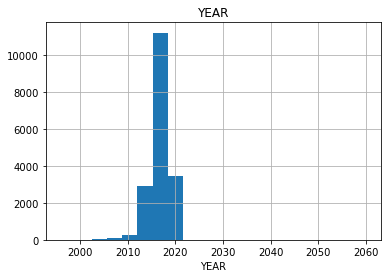

################################################
count   17966.00
mean    12279.53
std      4741.34
min       495.00
25%      8999.00
50%     11291.00
75%     15299.00
max     54995.00
Name: PRICE, dtype: float64


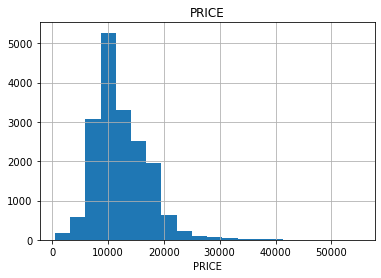

################################################
count    17966.00
mean     23362.61
std      19472.05
min          1.00
25%       9987.00
50%      18242.50
75%      31060.00
max     177644.00
Name: MILEAGE, dtype: float64


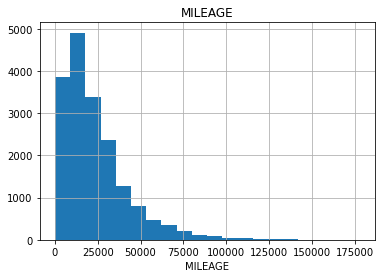

################################################
count   17966.00
mean       57.91
std        10.13
min        20.80
25%        52.30
50%        58.90
75%        65.70
max       201.80
Name: MPG, dtype: float64


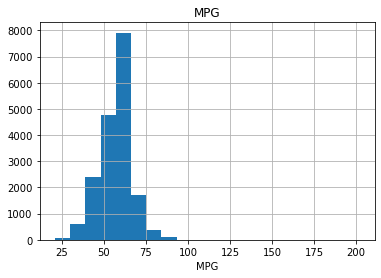

################################################
count   17966.00
mean        1.35
std         0.43
min         0.00
25%         1.00
50%         1.20
75%         1.50
max         5.00
Name: ENGINESIZE, dtype: float64


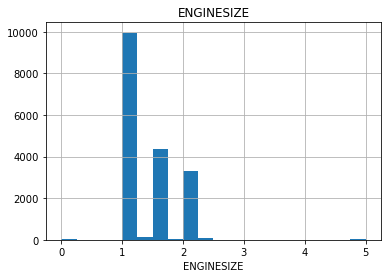

################################################


In [72]:
for i in num_cols:
    num_summary(df, i, plot=True)
    print("################################################")

In [73]:
# MPG

In [74]:
df.head()

,MODEL,YEAR,PRICE,TRANSMISSION,MILEAGE,FUELTYPE,MPG,ENGINESIZE
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.70,1.00
1,Focus,2018,14000,Manual,9083,Petrol,57.70,1.00
2,Focus,2017,13000,Manual,12456,Petrol,57.70,1.00
3,Fiesta,2019,17500,Manual,10460,Petrol,40.30,1.50
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.70,1.00


In [75]:
df["FUEL_PER_100KM"] = (1 / (df["MPG"] * 0.425144)) * 100

In [76]:
df.head()

,MODEL,YEAR,PRICE,TRANSMISSION,MILEAGE,FUELTYPE,MPG,ENGINESIZE,FUEL_PER_100KM
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.70,1.00,4.08
1,Focus,2018,14000,Manual,9083,Petrol,57.70,1.00,4.08
2,Focus,2017,13000,Manual,12456,Petrol,57.70,1.00,4.08
3,Fiesta,2019,17500,Manual,10460,Petrol,40.30,1.50,5.84
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.70,1.00,4.83


In [77]:
df.drop("MPG", axis=1, inplace=True)

In [78]:
df.head()

,MODEL,YEAR,PRICE,TRANSMISSION,MILEAGE,FUELTYPE,ENGINESIZE,FUEL_PER_100KM
0,Fiesta,2017,12000,Automatic,15944,Petrol,1.00,4.08
1,Focus,2018,14000,Manual,9083,Petrol,1.00,4.08
2,Focus,2017,13000,Manual,12456,Petrol,1.00,4.08
3,Fiesta,2019,17500,Manual,10460,Petrol,1.50,5.84
4,Fiesta,2019,16500,Automatic,1482,Petrol,1.00,4.83


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MODEL           17966 non-null  object 
 1   YEAR            17966 non-null  int64  
 2   PRICE           17966 non-null  int64  
 3   TRANSMISSION    17966 non-null  object 
 4   MILEAGE         17966 non-null  int64  
 5   FUELTYPE        17966 non-null  object 
 6   ENGINESIZE      17966 non-null  float64
 7   FUEL_PER_100KM  17966 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


## Missing Values, Outlier Analysis

In [80]:
import seaborn as sns

In [81]:
df.isnull().sum() # we don't have any missing values.

MODEL             0
YEAR              0
PRICE             0
TRANSMISSION      0
MILEAGE           0
FUELTYPE          0
ENGINESIZE        0
FUEL_PER_100KM    0
dtype: int64

In [82]:
num_cols = [i for i in df.columns if str(df[i].dtypes) in ["float64","int64"]]

num_cols

['YEAR', 'PRICE', 'MILEAGE', 'ENGINESIZE', 'FUEL_PER_100KM']

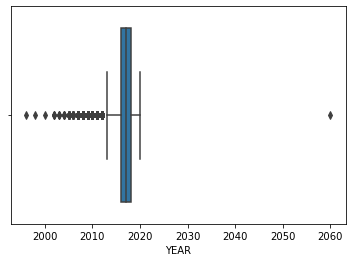

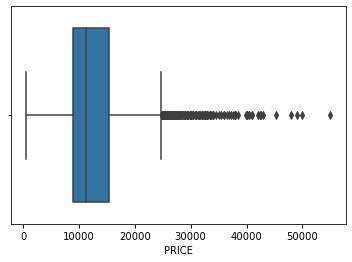

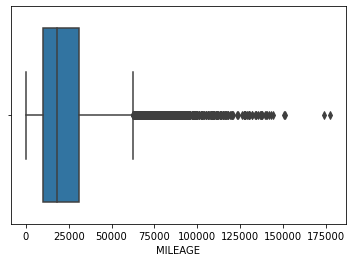

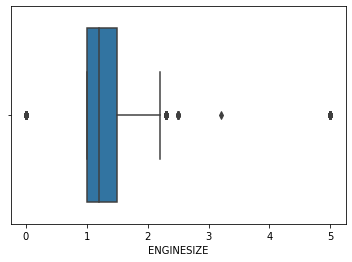

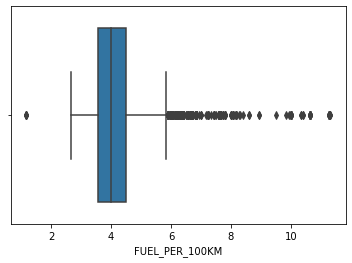

In [83]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show(block=True) # before outlier analysis

In [84]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [85]:
for i in num_cols:
    replace_with_thresholds(df, i)

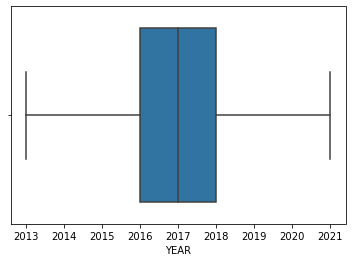

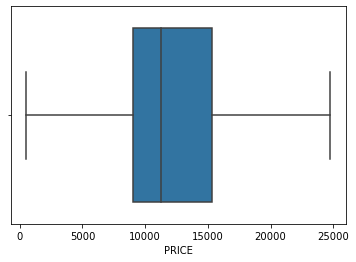

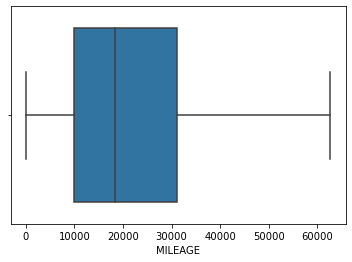

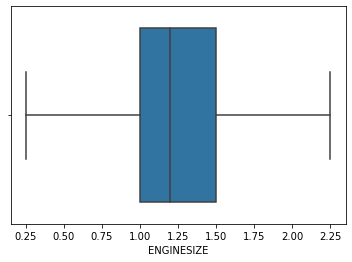

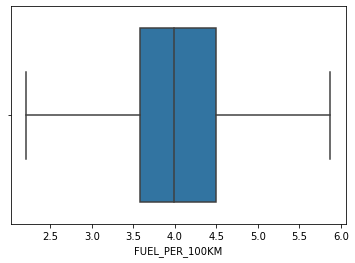

In [86]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show(block=True) # after outlier analysis

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,17966.00,2016.96,1.70,2013.00,2016.00,2017.00,2018.00,2021.00
PRICE,17966.00,12206.42,4463.61,495.00,8999.00,11291.00,15299.00,24749.00
MILEAGE,17966.00,22423.41,16426.93,1.00,9987.00,18242.50,31060.00,62669.50
ENGINESIZE,17966.00,1.34,0.39,0.25,1.00,1.20,1.50,2.25
FUEL_PER_100KM,17966.00,4.16,0.72,2.20,3.58,3.99,4.50,5.87


In [88]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={"size": 12}, linecolor="w", cmap="RdBu")

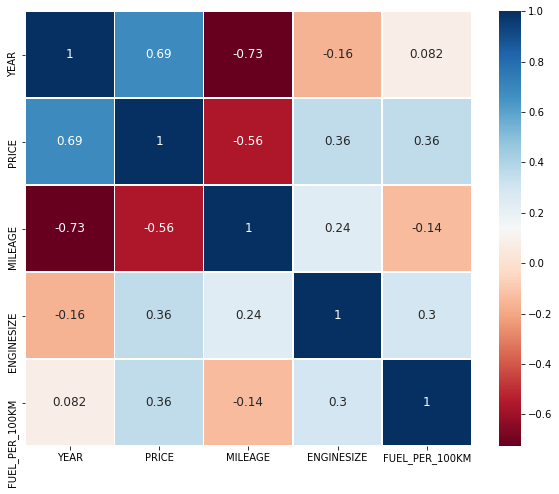

In [89]:
correlation_matrix(df, num_cols)

In [90]:
df.drop("FUEL_PER_100KM", axis=1, inplace=True)
df.drop("ENGINESIZE", axis=1, inplace=True)

## Label Encoder, Robuts Scaler, Train - Test Split

In [91]:
df.head()

,MODEL,YEAR,PRICE,TRANSMISSION,MILEAGE,FUELTYPE
0,Fiesta,2017.00,12000.00,Automatic,15944.00,Petrol
1,Focus,2018.00,14000.00,Manual,9083.00,Petrol
2,Focus,2017.00,13000.00,Manual,12456.00,Petrol
3,Fiesta,2019.00,17500.00,Manual,10460.00,Petrol
4,Fiesta,2019.00,16500.00,Automatic,1482.00,Petrol


In [92]:
df['YEAR'] = df['YEAR'].astype(int)
df['MILEAGE'] = df['MILEAGE'].astype(int)

In [93]:
df.head()

,MODEL,YEAR,PRICE,TRANSMISSION,MILEAGE,FUELTYPE
0,Fiesta,2017,12000.00,Automatic,15944,Petrol
1,Focus,2018,14000.00,Manual,9083,Petrol
2,Focus,2017,13000.00,Manual,12456,Petrol
3,Fiesta,2019,17500.00,Manual,10460,Petrol
4,Fiesta,2019,16500.00,Automatic,1482,Petrol


In [94]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["MODEL"] = le.fit_transform(df["MODEL"])
df["TRANSMISSION"] = le.fit_transform(df["TRANSMISSION"])
df["FUELTYPE"] = le.fit_transform(df["FUELTYPE"])

In [95]:
df.head()

,MODEL,YEAR,PRICE,TRANSMISSION,MILEAGE,FUELTYPE
0,5,2017,12000.00,0,15944,4
1,6,2018,14000.00,1,9083,4
2,6,2017,13000.00,1,12456,4
3,5,2019,17500.00,1,10460,4
4,5,2019,16500.00,0,1482,4


In [96]:
# Train - Test Split

from sklearn.model_selection import train_test_split

y = df['PRICE'] # target
X = df.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=144)

## ML Models

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

In [98]:
def train_predict_results(model):

    model = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
        
    print("Model Name: {}".format(repr(model).split("(")[0]))
    print("First RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
    
    print("Test Score: {}".format(model.score(X_test, y_test)))
    print("Train Score: {}".format(model.score(X_train, y_train)))
    
    return model

In [99]:
linear_model = train_predict_results(LinearRegression())

Model Name: LinearRegression
First RMSE: 2760.5134183358064
Test Score: 0.6145732115871654
Train Score: 0.6268498223513175


In [100]:
ridge_model = train_predict_results(Ridge())

Model Name: Ridge
First RMSE: 2760.50884024056
Test Score: 0.614574489986374
Train Score: 0.6268498217806373


In [101]:
lasso_model = train_predict_results(Lasso())

Model Name: Lasso
First RMSE: 2760.3947337184472
Test Score: 0.614606352703048
Train Score: 0.6268494055904021


In [102]:
xgb_model = train_predict_results(XGBRegressor())

Model Name: XGBRegressor
First RMSE: 1755.7727859460203
Test Score: 0.8440810872178246
Train Score: 0.8920096188244295


In [103]:
light_model = train_predict_results(LGBMRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 14372, number of used features: 5
[LightGBM] [Info] Start training from score 12204.986014
Model Name: LGBMRegressor
First RMSE: 1711.7157320189597
Test Score: 0.8518077624013842
Train Score: 0.8729431542334272


In [104]:
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}


lgbm_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

In [105]:
def hyperparameter_optimization(param, model):
    
    from sklearn.model_selection import GridSearchCV
    
    grid_search = GridSearchCV(estimator=model,
                    param_grid=param,
                    scoring='neg_root_mean_squared_error',
                    cv=5,
                    n_jobs=-1,
                    verbose=2).fit(X_train, y_train)
    
    model_final = model.set_params(**grid_search.best_params_).fit(X_train, y_train)
    
    y_pred = model_final.predict(X_test)
    print("Model Name: {}".format(repr(model_final).split("(")[0]))
    print("Best Params: {}".format(grid_search.best_params_))
    print("Optimal RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print("Test Score: {}".format(model_final.score(X_test, y_test)))
    print("Train Score: {}".format(model_final.score(X_train, y_train)))
    
    return model_final

In [106]:
lasso_final_model = hyperparameter_optimization(lasso_params, Lasso())

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Model Name: Lasso
Best Params: {'alpha': 0.1}
Optimal RMSE: 2760.5014109081535
Test Score: 0.6145765645679415
Train Score: 0.6268498181837159


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished


In [107]:
ridge_final_model = hyperparameter_optimization(ridge_params, Ridge())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Model Name: Ridge
Best Params: {'alpha': 100}
Optimal RMSE: 2760.0892103248143
Test Score: 0.6146916595306551
Train Score: 0.6268443655827951


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [108]:
xgb_final_model = hyperparameter_optimization(xgb_params, XGBRegressor())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    4.5s finished


Model Name: XGBRegressor
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Optimal RMSE: 1717.638335278908
Test Score: 0.8507804864078156
Train Score: 0.8771187395221527


In [109]:
lgbm_final_model = hyperparameter_optimization(lgbm_params, LGBMRegressor())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.8s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 14372, number of used features: 5
[LightGBM] [Info] Start training from score 12204.986014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Model Name: LGBMRegressor
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Optimal RMSE: 1712.320629849106
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test Score: 0.8517030055188075
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train Score: 0.8733180830743004


**LGBMRegressor performs effectively. There is a slight possibility of overfitting (Train Score > Test Score), but I ignore it.**

## Interface of the Project

In [110]:
from tkinter import *
from tkinter import messagebox
from tkinter import filedialog
from tkinter.ttk import Combobox
from tkinter import messagebox
from tkinter import Canvas
from tkinter import ttk

In [111]:
window = Tk()
window.title("Car Price Prediction")

window.configure(background='#6C8190')
window.geometry("1700x900")
window.state("normal")

def positive():
    messagebox.showinfo(title="successfull", message="Successfully!")

def negative():
    messagebox.showwarning(title="error", message="Please make a choice!")
    
# MODEL

def model_change():
    global model
    
    model = model_box.get()
    
    if(model == "Fiesta"):
        model = 0
        positive()
    elif(model == "Focus"):
        model = 1
        positive()
    elif(model == "Kuga"):
        model = 2
        positive()
    elif(model == "EcoSport"):
        model = 3
        positive()
    elif(model == "C-MAX"):
        model = 4
        positive()
    elif(model == "Ka+"):
        model = 5
        positive()
    elif(model == "Mondeo"):
        model = 6
        positive()
    elif(model == "B-MAX"):
        model = 7
        positive()
    elif(model == "S-MAX"):
        model = 8
        positive()
    elif(model == "Grand C-MAX"):
        model = 9
        positive()
    elif(model == "Galaxy"):
        model = 10
        positive()
    elif(model == "Edge"):
        model = 11
        positive()
    elif(model == "KA"):
        model = 12
        positive()   
    elif(model == "Puma"):
        model = 13
        positive()
    elif(model == "Tourneo Custom"):
        model = 14
        positive()
    elif(model == "Grand Tourneo Connect"):
        model = 15
        positive()
    elif(model == "Mustang"):
        model = 16
        positive()
    elif(model == "Tourneo Connect"):
        model = 17
        positive()
    elif(model == "Fusion"):
        model = 18
        positive()
    elif(model == "Streetka"):
        model = 19
        positive()
    elif(model == "Escort"):
        model = 20
        positive()
    elif(model == "Focus"):
        model = 21
        positive()
    elif(model == "Transit Tourneo"):
        model = 22
        positive()
    elif(model == "Ranger"):
        model = 23
        positive()
    else:
        negative()
    
def year_change():
    global year
    year_ent = int(year_entry.get())
    if(year_ent > 0):
        year = year_ent
        positive()
    else:
        negative()
        
          
def transmission_change():
    
    global transmission  
    transmission_value = transmission_box.get()
    
    if(transmission_value == "Manual"):
        transmission = 0
        positive()
    elif(transmission_value == "Automatic"):
        transmission = 1
        positive()
    elif(transmission_value == "Semi-Auto"):
        transmission = 2
        positive()
    else:
        negative()
    
def km_change():
    global km
    km_ent = int(km_entry.get())
    if(km_ent > 0):
        km = km_ent
        print(km)
        positive()
    else:
        negative()
    
        
def fuel_change():
    global fuel   
    fuel_value = fuel_box.get()
    
    if(fuel_value == "Petrol"):
        fuel = 0
        positive()
    elif(fuel_value == "Diesel"):
        fuel = 1
        positive()
    elif(fuel_value == "Hybrid"):
        fuel = 2
        positive()
    elif(fuel_value == "Electric"):
        fuel = 3
        positive()
    elif(fuel_value == "Other"):
        fuel = 4
        positive()
    else:
        negative()
    
        
headline = Label(window, text = "Car Price Prediction", font="Verdana 50",borderwidth=20, padx = 550, pady = 40,
                     background = "#90cdf4")        
headline.place(x = 70 ,y = 20)


# MODEL

model_label = Label(text = "Choose the Model", font="Verdana 12",borderwidth=6)
model_label.place(x = 100, y = 300)

model_names = ["Fiesta", "Focus", "Kuga", "EcoSport", "C-MAX", "Ka+", "Mondeo", "B-MAX", "S-MAX", "Grand C-MAX", "Galaxy", "Edge", "KA", "Puma", "Tourneo Custom", "Grand Tourneo Connect", "Mustang", "Tourneo Connect", "Fusion", "Streetka", "Escort", "Focus", "Transit Tourneo", "Ranger"]
model_box = Combobox(window, values = model_names)
model_box.place(x = 100,y = 350)

model_button = Button(window, text = "Choose", command = model_change, font="Verdana 12",borderwidth=6)
model_button.place(x = 100, y = 400)

# YEAR
year_label = Label(window, text = "Choose the Year", font="Verdana 12",borderwidth=6)
year_label.place(x = 300, y = 500)

year_entry = Entry()
year_entry.place(x = 300, y = 550)

year_button = Button(window, text = "Choose", command = year_change, font="Verdana 12",borderwidth=6)
year_button.place(x = 300, y = 600)

# TRANSMISSION
transmission_label = Label(text = "Choose the Transmission Type", font="Verdana 12",borderwidth=6)
transmission_label.place(x = 500, y = 300)

transmissions = ["Manual", "Automatic", "Semi-Auto"]
transmission_box = Combobox(window, values = transmissions)
transmission_box.place(x = 500,y = 350)

transmission_button = Button(window, text = "Choose", command = transmission_change, font="Verdana 12",borderwidth=6)
transmission_button.place(x = 500, y = 400)

# KM 

km_label = Label(window, text = "Choose the Mileage", font="Verdana 12",borderwidth=6)
km_label.place(x = 100, y = 500)

km_entry = Entry()
km_entry.place(x = 100, y = 550)

km_button = Button(window, text = "Choose", command = km_change, font="Verdana 12",borderwidth=6)
km_button.place(x = 100, y = 600)

# FUEL

fuel_label = Label(text = "Choose the Fuel Type", font="helvetica 12",borderwidth=6)
fuel_label.place(x = 300, y = 300)

fuels = ["Petrol","Diesel","Hybrid","Electric","Other"]
fuel_box = Combobox(window, values = fuels)
fuel_box.place(x = 300,y = 350)

fuel_button = Button(window, text = "Choose", command = fuel_change, font="Verdana 12",borderwidth=6)
fuel_button.place(x = 300, y = 400)


def predict_data():
    
    new_data = [[model],[year],[transmission],[km],[fuel]]
    new_data = pd.DataFrame(new_data).T
    
    
    pred = lgbm_final_model.predict(new_data)

    if(pred < 0):
        pred = -1*pred

    pred = int(pred)

    s2 = Label(window, text = str(pred) + "$", font="Verdana 12",borderwidth=6, padx = 150, pady = 50)
    s2.place(x = 1000, y = 500)
    

predict_button = Button(window, text="PREDICT", command=predict_data, font="Verdana 12", borderwidth=6, padx=100, pady=40, background="#f7fafc")
predict_button.place(x=1200, y=300)


mainloop()